In [1]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Preprocessing tools
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# Deep learning tols
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import set_config
set_config(transform_output='pandas')

In [2]:
# Load data from your path
df = pd.read_csv("Data/cancer.csv", index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Check for null values
df.isna().sum().sum()

0

In [4]:
# Define X and y
target = 'diagnosis'
X = df.drop(columns = target)
y = df[target]
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# Convert target to numbers
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
y_train_enc

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [6]:
# Convert encoded target values to a series
y_train_enc = pd.Series(le.transform(y_train), index=y_train.index,
             name=target)
y_test_enc = pd.Series(le.transform(y_test), index=y_test.index,
             name=target)
y_train_enc

id
8913         0
915691       1
904689       0
9110732      1
881046502    1
            ..
859711       0
863031       0
8910721      0
908489       1
862965       0
Name: diagnosis, Length: 426, dtype: int32

In [7]:
# Check class balance
y_train_enc.value_counts(normalize = True)

0    0.629108
1    0.370892
Name: diagnosis, dtype: float64

In [8]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_tf = scaler.transform(X_train)
X_test_tf = scaler.transform(X_test)

In [9]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train_tf.shape[1]
input_shape

30

In [10]:
# Sequential model
model = Sequential()

In [11]:
# First hidden layer
model.add(Dense(30, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

In [12]:
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [13]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam',)

In [14]:
# Reviewing the model summary before training
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Step 3: Fit our model
history = model.fit(X_train_tf, y_train_enc,
                    validation_data = (X_test_tf, y_test_enc), 
                    epochs=10)

Epoch 1/10
14/14 [==============================] - 1s 22ms/step - loss: 0.5514 - val_loss: 0.4082
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 0.3862 - val_loss: 0.2878
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 0.2926 - val_loss: 0.2166
Epoch 4/10
14/14 [==============================] - 0s 5ms/step - loss: 0.2367 - val_loss: 0.1748
Epoch 5/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1997 - val_loss: 0.1457
Epoch 6/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1727 - val_loss: 0.1262
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1526 - val_loss: 0.1109
Epoch 8/10
14/14 [==============================] - 0s 6ms/step - loss: 0.1373 - val_loss: 0.1001
Epoch 9/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1247 - val_loss: 0.0919
Epoch 10/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1143 - val_loss: 0.0868


In [16]:
# History.history is a dictionary
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [17]:
# Metric value for every training epoch
history.history['loss']

[0.551426351070404,
 0.3862449526786804,
 0.2926241159439087,
 0.23666299879550934,
 0.199720099568367,
 0.17271792888641357,
 0.15263010561466217,
 0.1373264640569687,
 0.12473097443580627,
 0.11429955810308456]

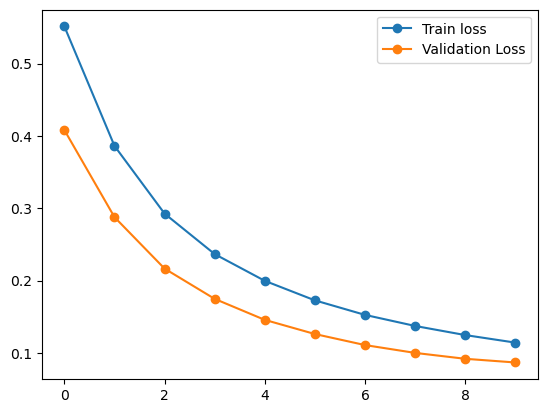

In [18]:
# Visualize the loss
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Train loss', marker='o')
ax.plot(history.history['val_loss'], label='Validation Loss', marker='o')
ax.legend();

# Evaluating Neural Networks

In [19]:
# Sequential model
model = Sequential()

# First hidden layer
model.add(Dense(30, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
# Metrics are specified during the .compile step
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam'
              , metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')
                        ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Step 3: Fit our model
history = model.fit(X_train_tf, y_train_enc,
                    validation_data = (X_test_tf, y_test_enc), 
                    epochs=10)

Epoch 1/10
14/14 [==============================] - 2s 39ms/step - loss: 0.6075 - accuracy: 0.6455 - recall: 0.7975 - precision: 0.5143 - val_loss: 0.4913 - val_accuracy: 0.8531 - val_recall: 0.9444 - val_precision: 0.7391
Epoch 2/10
14/14 [==============================] - 0s 9ms/step - loss: 0.4061 - accuracy: 0.9131 - recall: 0.9177 - precision: 0.8580 - val_loss: 0.3249 - val_accuracy: 0.9790 - val_recall: 1.0000 - val_precision: 0.9474
Epoch 3/10
14/14 [==============================] - 0s 8ms/step - loss: 0.2829 - accuracy: 0.9484 - recall: 0.9430 - precision: 0.9198 - val_loss: 0.2269 - val_accuracy: 0.9790 - val_recall: 1.0000 - val_precision: 0.9474
Epoch 4/10
14/14 [==============================] - 0s 8ms/step - loss: 0.2109 - accuracy: 0.9601 - recall: 0.9304 - precision: 0.9608 - val_loss: 0.1693 - val_accuracy: 0.9790 - val_recall: 0.9815 - val_precision: 0.9636
Epoch 5/10
14/14 [==============================] - 0s 12ms/step - loss: 0.1695 - accuracy: 0.9718 - recall: 0.

In [22]:
# Convert the history to a dataframe for readability
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,recall,precision,val_loss,val_accuracy,val_recall,val_precision
0,0.607526,0.645540,0.797468,0.514286,0.491318,0.853147,0.944444,0.739130
1,0.406139,0.913146,0.917722,0.857988,0.324861,0.979021,1.000000,0.947368
2,0.282922,0.948357,0.943038,0.919753,0.226922,0.979021,1.000000,0.947368
3,0.210887,0.960094,0.930380,0.960784,0.169298,0.979021,0.981481,0.963636
4,0.169474,0.971831,0.943038,0.980263,0.133178,0.986014,0.981481,0.981481
5,0.142639,0.976526,0.955696,0.980519,0.110165,0.986014,0.981481,0.981481
6,0.124409,0.976526,0.962025,0.974359,0.094176,0.986014,0.981481,0.981481
7,0.110544,0.976526,0.962025,0.974359,0.082711,0.986014,0.981481,0.981481
8,0.100254,0.978873,0.968354,0.974522,0.074739,0.993007,0.981481,1.000000
9,0.092156,0.978873,0.968354,0.974522,0.068238,0.993007,0.981481,1.000000


In [23]:
# Custom function for plotting each metric
def plot_history(history, figsize=(6,12), marker='o'):
       
    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]
    
    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)
    
    # For each metric
    for i, metric_name in enumerate(metrics):
    
        # Get the axis for the current metric
        ax = axes[i]
    
        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch
    
        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)
    
        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)
    
        # Final subplot adjustments 
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

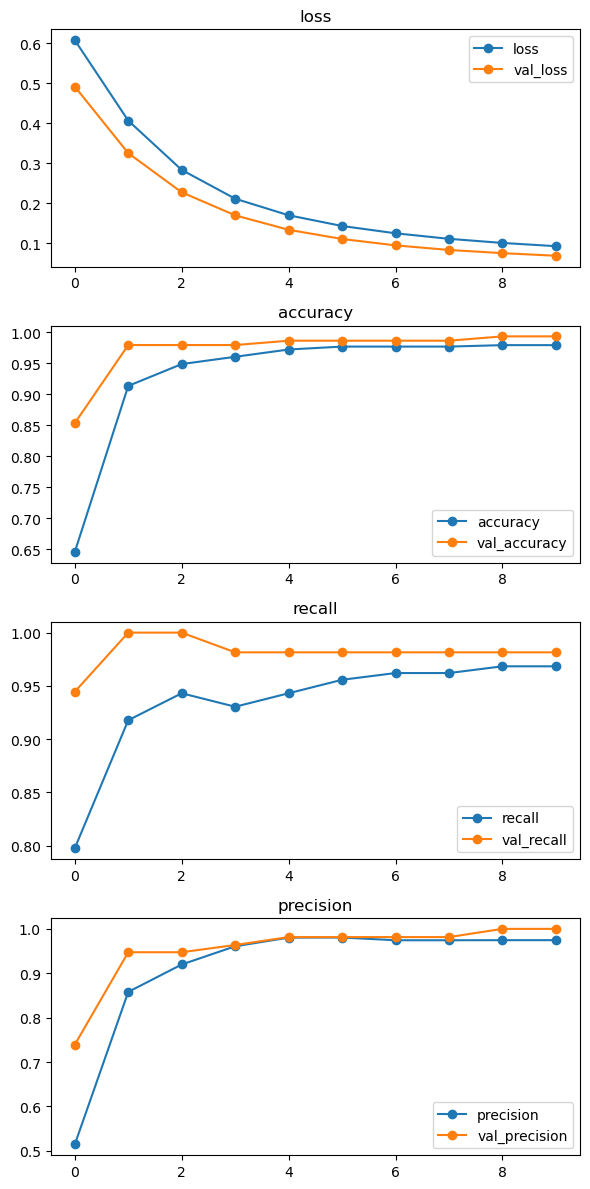

In [24]:
# Call the custom function
plot_history(history);

In [25]:
# Sequential model
model = Sequential()

# First hidden layer
model.add(Dense(30, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'sigmoid'))

### Metrics are specified during the.compile step
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam'
              , metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision'),
                        ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 10)                310       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
11/11 [==============================] - 2s 58ms/step - loss: 0.6135 - accuracy: 0.7176 - recall: 0.7480 - precision: 0.5975 - val_loss: 0.5477 - val_accuracy: 0.8140 - val_recall: 0.7742 - val_precision: 0.7273
Epoch 2/10
11/11 [==============================] - 0s 36ms/step - loss: 0.5091 - accuracy: 0.8265 - recall: 0.8346 - precision: 0.7361 - val_loss: 0.4565 - val_accuracy: 0.8605 - val_recall: 0.8387 - val_precision: 0.7879
Epoch 3/10
11/11 [==============================] - 0s 25ms/step - loss: 0.4256 - accuracy: 0.8794 - recall: 0.8583 - precision: 0.8258 - val_loss: 0.3800 - val_accuracy: 0.9070 - val_recall: 0.8710 - val_precision: 0.8710
Epoch 4/10
11/11 [==============================] - 0s 13ms/step - loss: 0.3548 - accuracy: 0.9118 - recall: 0.8740 - precision: 0.8880 - val_loss: 0.3195 - val_accuracy: 0.9070 - val_recall: 0.8710 - val_precision: 0.8710
Epoch 5/10
11/11 [==============================] - 0s 10ms/step - loss: 0.2985 - accuracy: 0.9324 - recall:

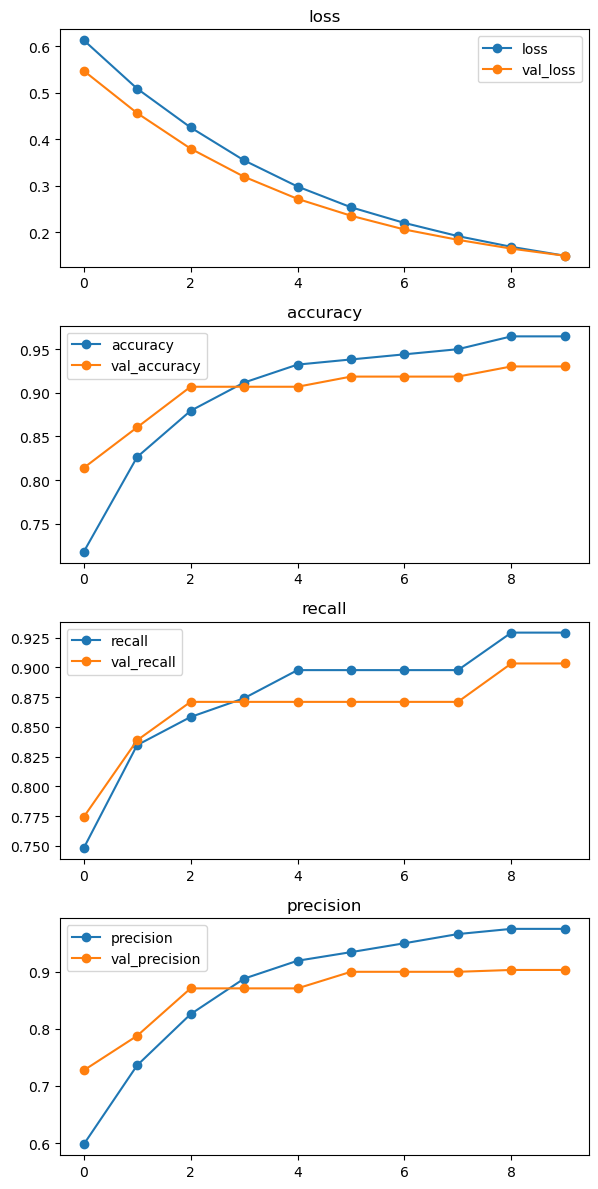

In [26]:
# Step 3: Fit our model
history = model.fit(X_train_tf, y_train_enc,
                    validation_split=.2, 
                    epochs=10)

plot_history(history);

In [27]:
# Evaluate neural network with builtin evaluation
result = model.evaluate(X_test_tf, y_test_enc,return_dict=True)
result

5/5 [==============================] - 0s 5ms/step - loss: 0.1214 - accuracy: 0.9650 - recall: 0.9815 - precision: 0.9298


{'loss': 0.12142794579267502,
 'accuracy': 0.9650349617004395,
 'recall': 0.9814814925193787,
 'precision': 0.9298245906829834}

In [28]:
# make predictions
y_pred_test = model.predict(X_test_tf)
y_pred_test[:5]

5/5 [==============================] - 0s 3ms/step


array([[0.27918658],
       [0.95463604],
       [0.8773387 ],
       [0.10823628],
       [0.0424062 ]], dtype=float32)

In [29]:
# round the predictions
y_pred_test = np.round(y_pred_test)
y_pred_test[:5]

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        89
           1       0.93      0.98      0.95        54

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



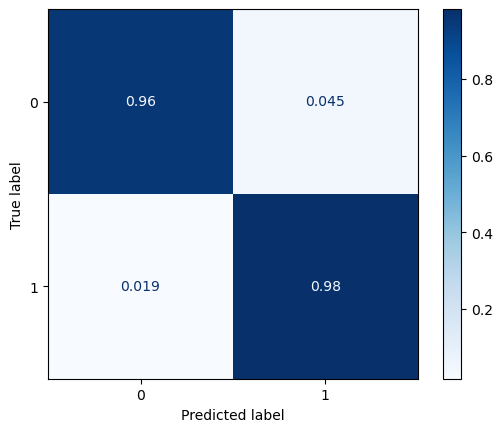

In [30]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test_enc, y_pred_test))
 
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_pred_test, cmap='Blues',
                                       normalize='true');